[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farheenfab/AppliedText_CW/blob/main/CW1-analyze_dataset.ipynb)

In [282]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [283]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import nltk
import spacy


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ishaq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [284]:
# get file from disk
filename = 'final_comments_df.csv'
final_comments_df=pd.read_csv(filename)

In [285]:
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,Ugy-KFRJEyLP3-Du2NR4AaABAg,NaN,angelinaho3925,2019-07-29T00:53:46Z,2019-07-29T00:53:46Z,4637,Bro if I got this app it would have zero peopl...
1,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgwsjfEbqBVRwYcODU94AaABAg,NaN,howlymoly914,2019-07-29T00:23:17Z,2019-07-29T00:23:17Z,2155,All I can say is *Finally*\nKim so hyun is her...
2,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgxLBdmqw7jmI9LoagR4AaABAg,NaN,clairerominez1318,2019-08-01T11:22:44Z,2019-08-01T11:22:44Z,378,Another highschool drama with Kim So Hyun! \n\...
3,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgzcW2rhCFEOYOJGAyh4AaABAg,NaN,panitia_rimaajengnurraihan9346,2019-07-29T00:41:51Z,2019-07-29T00:41:51Z,1527,I really miss her acting. The trailer look goo...
4,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,Ugy0TbVpmnqmpkJYyqJ4AaABAg,NaN,keanna2060,2019-07-29T10:52:00Z,2019-07-29T10:52:54Z,319,Finally! Kim So Hyun is back with a school-ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgyzRe-vXQmWjC-XM514AaABAg.9LLn5MgkwPr9LNXJY_qr2f,UgyzRe-vXQmWjC-XM514AaABAg,kavyx7384,2021-03-27T03:10:47Z,2021-03-27T03:10:47Z,0,Stealed? Jojo and Hyeyeong wasn’t in a relatio...
10984,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgyzRe-vXQmWjC-XM514AaABAg.9LLn5MgkwPr9LTxmreeeQL,UgyzRe-vXQmWjC-XM514AaABAg,yoshhikko6735,2021-03-29T15:06:18Z,2021-03-29T15:06:18Z,2,@Gimmi zz lol sun oh knew that hye yeong likes...
10985,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgyzRe-vXQmWjC-XM514AaABAg.9LLn5MgkwPr9LWJ12yIqsf,UgyzRe-vXQmWjC-XM514AaABAg,rolazeineddine8819,2021-03-30T12:59:05Z,2021-03-30T12:59:05Z,0,@tokwatbby he asked him many times if he likes...
10986,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgxdmS1iFiAzQa-vFsB4AaABAg,NaN,rose-gl4io,2021-03-23T01:20:46Z,2021-03-23T01:24:11Z,2,To anyone who hasn't watched this already\n\n*...


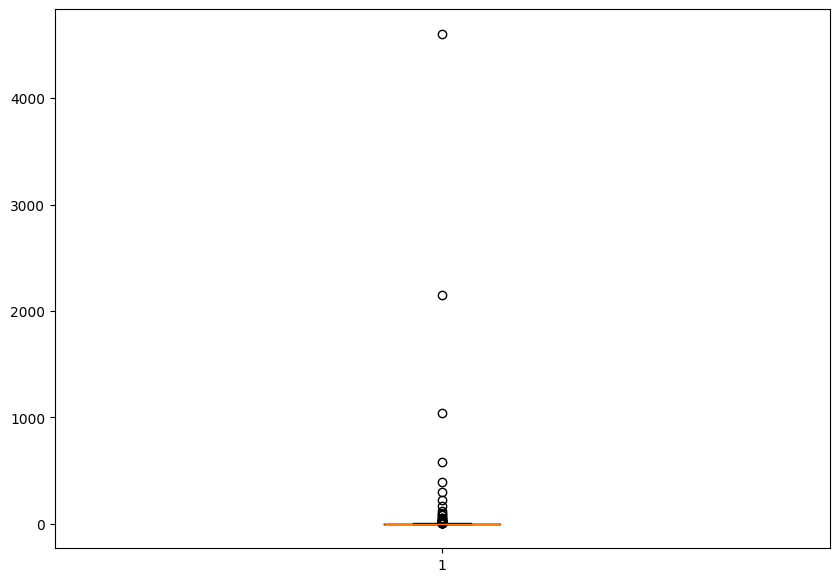

In [286]:
import matplotlib.pyplot as plt

data = final_comments_df['c_like_count'].value_counts()
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()


In [287]:
# number of comments per product 
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,4043
1,Love Alarm Season 2,6945


In [288]:
# product 0 is generated due to how I handled videos with comments disabled
# remove comments according to like threshold
# this is done to make sure the comment are relevent 
like_threshold=1
final_comments_df=final_comments_df[final_comments_df['c_like_count'] >= like_threshold]
final_comments_df

,product,v_title,v_videoId,v_channelTitle,v_publishTime,v_description,v_thumbnail,c_id,c_parentId,c_author,c_published_at,c_updated_at,c_like_count,c_text
0,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,Ugy-KFRJEyLP3-Du2NR4AaABAg,NaN,angelinaho3925,2019-07-29T00:53:46Z,2019-07-29T00:53:46Z,4637,Bro if I got this app it would have zero peopl...
1,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgwsjfEbqBVRwYcODU94AaABAg,NaN,howlymoly914,2019-07-29T00:23:17Z,2019-07-29T00:23:17Z,2155,All I can say is *Finally*\nKim so hyun is her...
2,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgxLBdmqw7jmI9LoagR4AaABAg,NaN,clairerominez1318,2019-08-01T11:22:44Z,2019-08-01T11:22:44Z,378,Another highschool drama with Kim So Hyun! \n\...
3,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,UgzcW2rhCFEOYOJGAyh4AaABAg,NaN,panitia_rimaajengnurraihan9346,2019-07-29T00:41:51Z,2019-07-29T00:41:51Z,1527,I really miss her acting. The trailer look goo...
4,Love Alarm Season 1,Love Alarm | Official Teaser | Netflix [ENG SUB],LhCQ7lHEjU8,Netflix K-Content,2019-07-29T00:00:00Z,"🔔 “The moment he rang my Love Alarm, I felt th...",https://i.ytimg.com/vi/LhCQ7lHEjU8/default.jpg,Ugy0TbVpmnqmpkJYyqJ4AaABAg,NaN,keanna2060,2019-07-29T10:52:00Z,2019-07-29T10:52:54Z,319,Finally! Kim So Hyun is back with a school-ro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgyAaDr5JieJj0qmZ594AaABAg.9KtAR4941Lh9KtEX4Xjt3C,UgyAaDr5JieJj0qmZ594AaABAg,serenitywinsss1707,2021-03-14T23:30:09Z,2021-03-14T23:30:09Z,1,Nope it wasn’t rewatch al the scenes and you’l...
10972,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,Ugyc2O0un3gBWMdPne54AaABAg.9MiSWGaGTsg9Mmp3eu4gzv,Ugyc2O0un3gBWMdPne54AaABAg,sanjeevkatiyar1269,2021-05-01T04:46:17Z,2021-05-01T04:46:17Z,2,That's why I didn't watched the second season ...
10984,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgyzRe-vXQmWjC-XM514AaABAg.9LLn5MgkwPr9LTxmreeeQL,UgyzRe-vXQmWjC-XM514AaABAg,yoshhikko6735,2021-03-29T15:06:18Z,2021-03-29T15:06:18Z,2,@Gimmi zz lol sun oh knew that hye yeong likes...
10986,Love Alarm Season 2,Love Alarm Season 2 | Official Trailer | Netfl...,g0Oj4A2rslY,Netflix K-Content,2021-02-26T00:00:19Z,The updated Love Alarm app v2.0 now shows you ...,https://i.ytimg.com/vi/g0Oj4A2rslY/default.jpg,UgxdmS1iFiAzQa-vFsB4AaABAg,NaN,rose-gl4io,2021-03-23T01:20:46Z,2021-03-23T01:24:11Z,2,To anyone who hasn't watched this already\n\n*...


In [289]:
# number of comments remaining per product after filtering
final_comments_df.groupby('product').size().reset_index(name='counts')

,product,counts
0,Love Alarm Season 1,1981
1,Love Alarm Season 2,4403


In [290]:
final_comments_df.groupby('v_title').size().reset_index(name='counts')


,v_title,counts
0,Love Alarm Review | NETFLIX | Love Alarm Seaso...,91
1,Love Alarm Season 2 ENDING EXPLAINED || Netfli...,588
2,Love Alarm Season 2 Review Netflix Original Se...,40
3,Love Alarm Season 2 | Official Trailer | Netfl...,3604
4,Love Alarm | Official Teaser | Netflix [ENG SUB],471
5,Love Alarm | Official Trailer | Netflix,1453
6,Love Alarm | Teaser | Netflix,57
7,Sun-Oh or Hye-young? Was Love Alarm Season 2 E...,80


In [291]:
# get sentiment
def analyze_sentiment(comment):
    try:
        analysis = TextBlob(comment)
        return analysis.sentiment.polarity
    except:
        return 0.0
# Textblob sentiment analysis used due to the size of the dataset
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)
final_comments_df[['v_title','c_text','c_author','c_blob_sentiment']].sort_values('c_blob_sentiment')

C:\Users\ishaq\AppData\Local\Temp\ipykernel_2292\2144388512.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_blob_sentiment"] = final_comments_df['c_text'].apply(analyze_sentiment)


,v_title,c_text,c_author,c_blob_sentiment
9539,Love Alarm Season 2 | Official Trailer | Netfl...,@Lily H I know but the webtoon isn’t finished ...,Cmdior,-1.0
10890,Love Alarm Season 2 | Official Trailer | Netfl...,Terrible ending,toimeiwong5035,-1.0
4013,Love Alarm | Official Trailer | Netflix,Worst drama i ever seen,cuteg7460,-1.0
10583,Love Alarm Season 2 | Official Trailer | Netfl...,TBH.. Jojo's kinda boring...,rovikhiangte479,-1.0
5281,Sun-Oh or Hye-young? Was Love Alarm Season 2 E...,Worst ending,hcmelodies7602,-1.0
...,...,...,...,...
5745,Love Alarm Season 2 | Official Trailer | Netfl...,lol!!!!,keziahnagaraj4839,1.0
5724,Love Alarm Season 2 | Official Trailer | Netfl...,Omy atleast someone understood... literally hy...,anushuyasaha6168,1.0
4559,Love Alarm Season 2 ENDING EXPLAINED || Netfli...,Jojo had to end up with hye yeong because if s...,Annamariagvn,1.0
5825,Love Alarm Season 2 | Official Trailer | Netfl...,ABSOLUTELY ME!!!!!!!!!! :V,MoarmyEn-,1.0


Im not sure if even mapping is the correct choice but ill go with this for now

In [292]:
def map_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "neutral"
    
# apply sentiment analysis on comment text and store in new column of the dataframe
final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)
final_comments_df[['v_videoId','c_text','c_blob_sentiment','c_sentiment']].sort_values('c_sentiment')
final_comments_df["c_sentiment"].value_counts()

C:\Users\ishaq\AppData\Local\Temp\ipykernel_2292\194784812.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_comments_df["c_sentiment"] = final_comments_df['c_blob_sentiment'].apply(map_sentiment)


c_sentiment
positive    2851
neutral     2329
negative    1204
Name: count, dtype: int64

In [293]:
from sklearn.model_selection import train_test_split

X = final_comments_df['c_text'] 
y = final_comments_df['c_sentiment'] 
# create a 20% test 80% train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [294]:
# product specific stopwords
product_tokens=np.concatenate([word_tokenize(product.lower()) for product in final_comments_df['product'].unique()])
# remove digits and any single character
product_tokens = [token for token in product_tokens if len(token) > 1 and not token.isdigit()]
product_tokens += ['drama', 'film', 'cinema', 'actor', 'actress', 'director', 'plot',
                         'scene', 'genre', 'subtitles', 'k-drama', 'kdrama', 'k-movie', 'television',
                         'episode', 'screenplay', 'script', 'cinematography', 'soundtrack',
                         'OST', 'character', 'plot twist', 'review', 'ratings', 'premiere',
                         'streaming', 'watchlist', 'subbed', 'dubbed', 'sequel', 'game', 'song',
                         'season', 'trailer', 'casting', 'fanbase', 'recommendation', 'goblin',
                         'viewer', 'critic', 'Korean', 'entertainment', 'watched', 'guardian',
                         'show', 'squid', 'watch', 'watching', 'acting', 'netflix', 'show',
                         'jojo', 'kim', 'hye', 'sun', 'yeong', 'end', 'start', 'like', 'oh', 'someone',
                         'people', 'girl', 'boy', 'man', 'women', 'woman', 'love', 'alarm', 'ring',
                         'application', 'technology', 'romance', 'relationship', 'friendship',
                         'emotion', 'heart', 'dating', 'app','feelings', 'confession', 'secret',
                         'school', 'ringing', 'notification','person','sunoh','year','feel','guy',
                         'sunho','everyone','hate','ending','know','end',
                         'heartache', 'crush','friend', 'friendship', 'romantic', 'triangle']

In [295]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


X = final_comments_df['c_text']
y = final_comments_df['c_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Processing
def preprocess_text(text):
    tokens = word_tokenize(text)
    # stopwords punctuation etc
    stop_words = set(stopwords.words('english'))
    stemmer = nltk.stem.SnowballStemmer('english')
    # stemmer = PorterStemmer()
    # split into tokens
    tokens = word_tokenize(text)
    # removes stopwords and numbers and stems from tokens makes sure its all lowercase too
    tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token.lower() not in stop_words and token.lower() not in product_tokens]
    return ' '.join(tokens)


In [296]:
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([
    ('preprocess', 
    TfidfVectorizer(preprocessor=preprocess_text,
                    norm='l2',
                    encoding='utf-8',
                    lowercase=True,
                    ngram_range=(1, 1),
                    max_df=0.8,
                    min_df=10,
                    binary=True,
                    max_features=500,
                    sublinear_tf=True)
    # CountVectorizer(preprocessor=preprocess_text,ngram_range=(1, 1))
     ), 
    ('classifier', LogisticRegression())
])

text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.58      0.68       221
     neutral       0.81      0.89      0.85       505
    positive       0.81      0.84      0.82       551

    accuracy                           0.81      1277
   macro avg       0.82      0.77      0.79      1277
weighted avg       0.81      0.81      0.81      1277



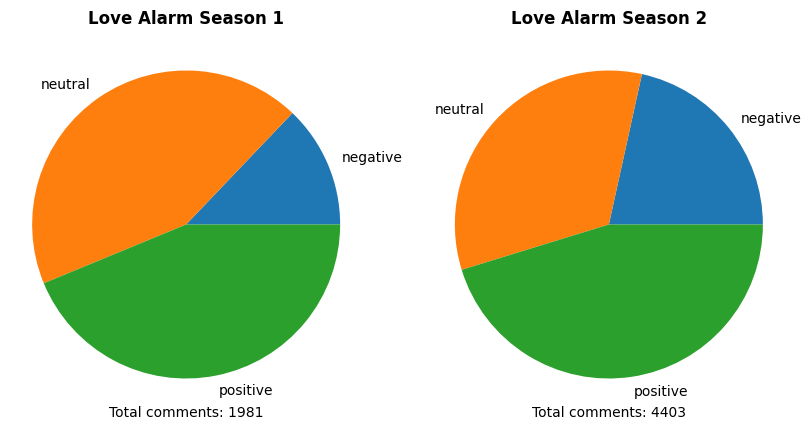

In [297]:
import matplotlib.pyplot as plt

products = sorted(final_comments_df['product'].unique())
sentiments = sorted(final_comments_df['c_sentiment'].unique())
count = 0

plt.figure(figsize=(10, 11))

for product in products:
    labels = sentiments

    val_counts = sorted(final_comments_df[final_comments_df['product'] == product]['c_sentiment'].value_counts())
    sizes = [val_count / sum(val_counts) for val_count in val_counts]

    plt.subplot(len(products)//2 + 1, 2, count % 6 + 1)
    plt.axis('equal')
    plt.title(product, fontweight='bold')

    plt.pie(sizes, labels=labels)
    bottom_text = f"Total comments: {len(final_comments_df[final_comments_df['product'] == product])}"
    plt.text(0.5, 0.0, bottom_text, size=10, ha="center", transform=plt.gca().transAxes)
    count += 1

plt.show()
# We can infer what the majority of people think about the product
# since these laptops are selected from the top 5 best laptops according to lapmag
# the sentiment is likely to be positive as it is here

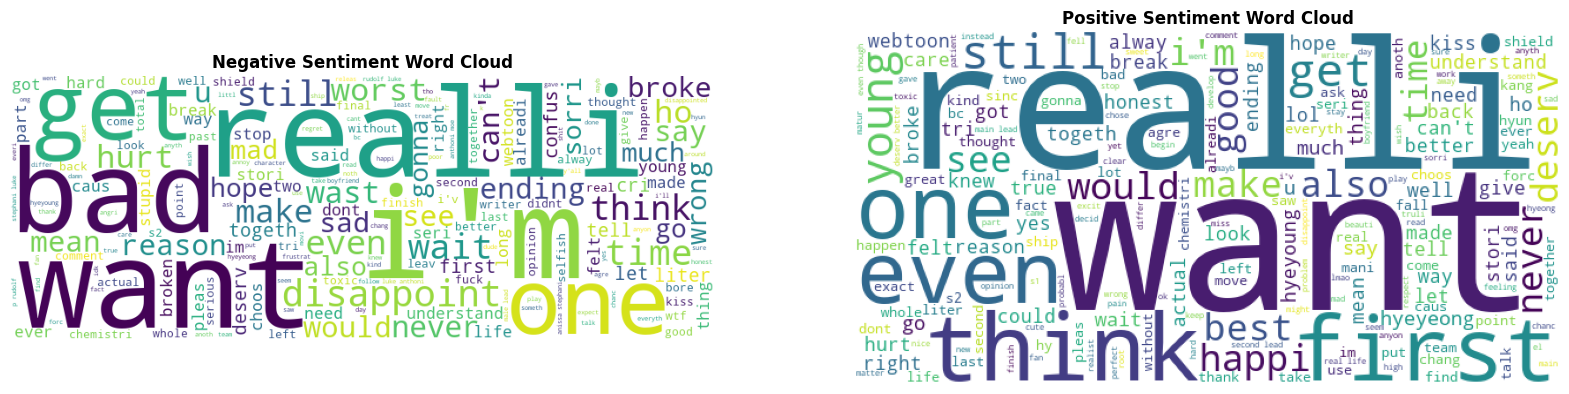

In [298]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_comments = final_comments_df[final_comments_df['c_sentiment'] == 'positive']['c_text']
negative_comments = final_comments_df[final_comments_df['c_sentiment'] == 'negative']['c_text']

stop_words = set(stopwords.words('english')).union(product_tokens)
# apply stemming to stop words
stemmer = nltk.stem.SnowballStemmer('english')
stop_words_stemmed = set([stemmer.stem(word) for word in stop_words])

positive_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in positive_comments]

negative_comments_stemmed = [' '.join([stemmer.stem(word) for word in comment.split()]) for comment in negative_comments]

wordcloud_positive = WordCloud(width=600, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(positive_comments_stemmed))
wordcloud_negative = WordCloud(width=800, height=300, background_color='white',
                               stopwords=stop_words_stemmed)\
                                .generate(' '.join(negative_comments_stemmed))



plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Negative Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_negative)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Positive Sentiment Word Cloud', fontweight='bold')
plt.imshow(wordcloud_positive)
plt.axis('off')

plt.show()
# shows words present in positive and negative sentiment text 

In [299]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

# text_clf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# parameters = {
#     'vectorizer': [TfidfVectorizer(),CountVectorizer()],
#     'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
#     'vectorizer__preprocessor':[preprocess_text],
#     'vectorizer__encoding':['utf-8'],
#     # 'vectorizer__max_df': [0.6, 0.9],
#     'vectorizer__min_df': [3],
#     # 'vectorizer__max_features': [1,2,3],
#     # 'vectorizer__norm': ['l1', 'l2'],
#     # 'vectorizer__smooth_idf': [False,True],
#     'vectorizer__binary':[False,True],
#     'vectorizer__lowercase':[False,True],
#     # 'vectorizer__sublinear_tf': [True, False],
#     # 'vectorizer__use_idf': [True, False],
#     'classifier': [
#                     MultinomialNB(),
#                     SVC(),
#                     LogisticRegression(),
#                     RandomForestClassifier()
#                    ],
# }

# grid_search = GridSearchCV(text_clf, parameters, cv=2, n_jobs=1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# print(classification_report(y_test, y_pred))